In [3]:
# imports  
import numpy as np
backend='nbagg' # Use the 'nbagg' backend to render and you can zoom and pan plots.  
backend='inline' # 
if backend=='nbagg':
    import matplotlib
    matplotlib.use('nbagg') # Use the 'nbagg' backend
else:
    # magic command to render inline
    %matplotlib inline 
    
#import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

We begin by creating a synthetic wedge model to re-create figure 4

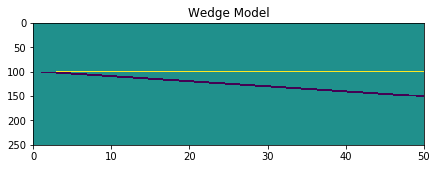

In [24]:
# generate wedge model
# vertical sampling parameters
dt = 1   # ms
to = 0   # start time
tf = 250 # end time
nt = (tf-to)/dt+1 # number of time samples

# lateral sampling parameters
dx = 1   # ms
xo = 0   # start wedge
xf = 50  # end wedge
nx = (xf-xo)/dx+1 # number of lateral samples

# reflection parameters
# top event location
t_top = 100
# convert to index
i_top = int(t_top/dt)+1

# slope for reflection
slope = 1
# thickness of reflector
thck = 2

# initialize numpy array for wedge model as zeroes
model = np.zeros((nx,nt),dtype='float32')
# place positive and negative reflectivity
for i in range(nx): 
    # place positive reflection
    model[i,i_top-thck:i_top+thck] = 2
    # place negative reflection
    model[i,(i_top+i*slope)-thck:(i_top+i*slope)+thck] -= 2
    
# plot model
fig = plt.figure(figsize=(7,7))
plt.title('Wedge Model')
plt.imshow(model.T,extent=[xo,xf,tf,to], aspect=.0625)
plt.show()


In [ ]:
# now we filter the wedge model
